# Problem statement - Recommending the movies based on number of ratings and users who have given them

## Importing some Python libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



## Loading the dataset in the notebook

### Users data

In [2]:
# getting the data
columns=['user_id','item_id','rating','timestamp']
data=pd.read_csv('u.data',sep='\t',names=columns)

In [3]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
len(data)

100003

### Movies Data

In [5]:
movie_titles=pd.read_csv('Movie_Id_Titles.txt')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
len(movie_titles)

1682

## Data Analysis

### Number of missing values in each column of the dataset 

In [7]:
data.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

### Number of unique users in the users dataset 

In [8]:
data['user_id'].nunique()

944

###  Number of unique movies in the users dataset

In [9]:
data['item_id'].nunique()

1682

Verifying the data type of attribute 'item_id' in both the datasets in order to remove any conflict during merging -

In [10]:
movie_titles['item_id'].dtype

dtype('int64')

In [11]:
data['item_id'].dtype

dtype('int64')

Merging the two datasets -

In [12]:
# merge the two datasets
data=pd.merge(data,movie_titles,on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


### Top 5 movies with the highest average rating 

In [13]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

### Top 10 movies with most number of user ratings

In [14]:
data['title'].value_counts()[0:10]

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64

In [30]:
# counting the number of ratings each movie gets
# data.groupby('title')['rating'].count().sort_values(ascending=False).head()

Converting the movie title with its average rating and number of ratings into a dataframe 

In [15]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
ratings['number of rating']=pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,number of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Sorting the number of ratings in decreasing order

In [17]:
ratings.sort_values('number of rating',ascending=False).head(10)

,rating,number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


### Data visualization

#### Distribution of frequency of movies number of ratings

Text(0, 0.5, 'Frequency of number of ratings')

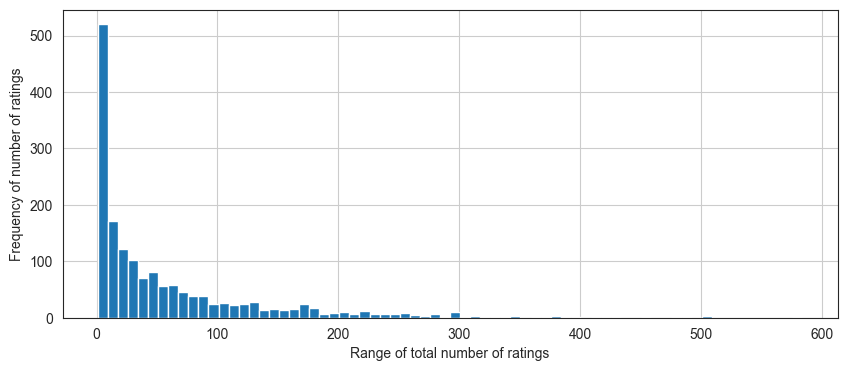

In [18]:
# creating histogram for the movies ratings
plt.figure(figsize=(10,4))  # 10 is width in inches and 4 is height in inches of the figure
ratings['number of rating'].hist(bins=70)
plt.xlabel('Range of total number of ratings')
plt.ylabel('Frequency of number of ratings')

The above histogram is right skewed and it tells us that most of the movies has less than 100 ratings.

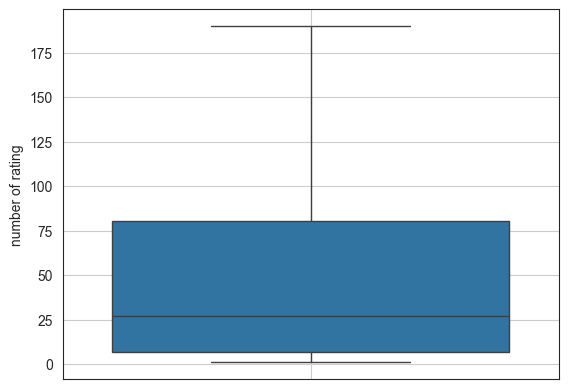

In [19]:
sns.boxplot(ratings['number of rating'], showfliers=False)
plt.grid()
plt.show()

#### Distribution of frequency of movie ratings

Text(0, 0.5, 'Frequency')

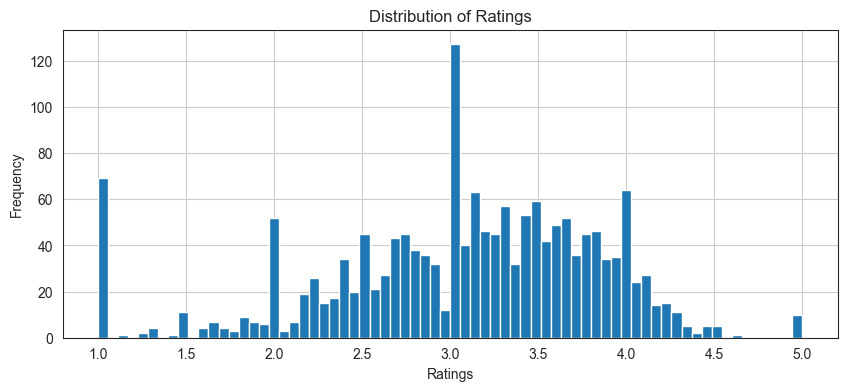

In [20]:
plt.figure(figsize=(10,4))
ratings[ 'rating'].hist(bins=70)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

This histogram is normally distributed and it tells us that most of movies has 2-star to 4-star rating

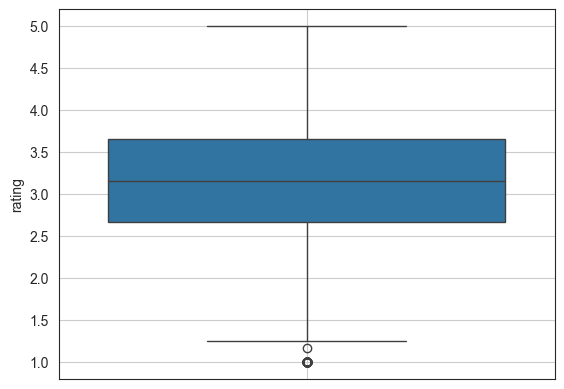

In [21]:
sns.boxplot(ratings['rating'],showfliers=True)
plt.grid()
plt.show()

In [1]:
# sns.jointplot(x='rating',y='number of rating',data=ratings,alpha=0.5)

#### Creating a pivot table having all the movies in x-axis and the users who have given some rating in y-axis. 

In [22]:
similarity=data.pivot_table(index='user_id',columns='title',values='rating')
similarity.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This pivot table will help us to see which movie got how much rating by which user_id

Taking an example of 'Star Wars' to see what all movies are recommended after that

In [23]:
# if we take star wars and then correlate the ratings of that movie with all other movies in the pivot table
starwars_user_ratings=similarity['Star Wars (1977)']
starwars_user_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

Checking the movies that has related user ratings as 'Star Wars'

In [24]:
similar_to_starwars=similarity.corrwith(starwars_user_ratings)

In [25]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

As we have displayed the correlation , we can clearly see that 'Til There Was You (1997)' is 87% similar to 'Star Wars' according to their ratings by different users.

Now convert this dictionary into a dataframe (that is in rows and columns) and remove the null value.

In [26]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head(10)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [27]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


In [28]:
corr_starwars = corr_starwars.join(ratings['number of rating'])
corr_starwars.head()

,Correlation,number of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


#### Recommending the top 5 movies who have more than 100 user ratings

In [29]:
top_movies=corr_starwars[corr_starwars['number of rating']>100].sort_values('Correlation',ascending=False).head()
top_movies

,Correlation,number of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


These are the movies which are being recommended after one has watched Star Wars.

## Get the top 5 movies recommended on the basis of user ratings

In [30]:
def find_similar_movies(movie):
    if(movie in similarity.columns):
        user_ratings=similarity[movie]
        similar_to_movie=similarity.corrwith(user_ratings)
        corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
        corr_movie.dropna(inplace=True)
        corr_movie = corr_movie.join(ratings['number of rating'])
        top_movies=corr_movie[corr_movie['number of rating']>100].sort_values('Correlation',ascending=False)
        top_movies=top_movies.drop(movie).head()
        return list(top_movies.index)
    else:
        print ('This movie is not available in the dataset ')
        return list()

In [31]:
# Assign your movie name here
movie=input('Enter Your Movie')

Enter Your Movie Star Wars (1977)


In [32]:
find_similar_movies(movie)

['Empire Strikes Back, The (1980)',
 'Return of the Jedi (1983)',
 'Raiders of the Lost Ark (1981)',
 'Austin Powers: International Man of Mystery (1997)',
 'Sting, The (1973)']